In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("ws7.ipynb")

In [1]:
rng_seed = 42

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
#below line allows matplotlib plots to appear in cell output
%matplotlib inline

## **Question 1**: F-Test for Comparing Population Means

In this question, you'll implement an F-test to compare the means of multiple normally distributed datasets. The F-test is a statistical hypothesis test that determines whether two or more groups have significantly different means by comparing their variances.

### Background: F-Test Theory

The F-test for comparing means is based on analysis of variance (ANOVA) principles. When comparing two groups, we test the null hypothesis that both groups have the same population mean (μ₁ = μ₂) against the alternative hypothesis that they have different means (μ₁ ≠ μ₂).

**Key Concepts:**

The F-statistic compares the **between-group variability** to the **within-group variability**:

$$F = \frac{\text{explained variance}}{\text{unexplained variance}} = \frac{\text{between-group variability}}{\text{within-group variability}}$$

**For two groups with sample sizes n₁ and n₂:**

**Between-group variability (explained variance):**
$$\text{MS}_{\text{between}} = \frac{n_1(\bar{Y}_1 - \bar{Y})^2 + n_2(\bar{Y}_2 - \bar{Y})^2}{K-1}$$

where $\bar{Y}_1$ and $\bar{Y}_2$ are the sample means of groups 1 and 2, $\bar{Y}$ is the overall mean, and K = 2 (number of groups).

**Within-group variability (unexplained variance):**
$$\text{MS}_{\text{within}} = \frac{\sum_{i=1}^{n_1}(Y_{1i} - \bar{Y}_1)^2 + \sum_{i=1}^{n_2}(Y_{2i} - \bar{Y}_2)^2}{N-K}$$

where N = n₁ + n₂ is the total sample size.

**F-statistic:**
$$F = \frac{\text{MS}_{\text{between}}}{\text{MS}_{\text{within}}}$$

**Interpretation:**
- **F > 1**: Between-group variation exceeds within-group variation → groups may have different means
- **F ≈ 1**: Between-group and within-group variations are similar → groups likely have the same mean
- **F < 1**: Within-group variation exceeds between-group variation → very strong evidence groups have the same mean

**Note**: Unlike the traditional F-test for comparing variances, the ANOVA F-statistic can be less than 1. When F < 1, it indicates that the variation between group means is smaller than the typical variation within groups, providing strong evidence that the population means are equal.

### Your Task

Write a function `find_most_similar_means(filename)` that:
1. Loads data from a CSV file containing multiple normally distributed datasets
2. Performs F-tests between every pair of datasets using ANOVA formulation
3. Returns the names of the two datasets most likely to have the same population mean (smallest F-statistic)

**Requirements:**
- Load the CSV file using `pd.read_csv(filename)`
- For each pair of datasets, calculate the F-statistic using the ANOVA formulation above
- Use `np.mean()` to calculate sample means and overall mean
- Calculate between-group and within-group mean squares as defined above
- Find the pair with the **smallest** F-statistic (most likely to have equal means)
- Return a tuple containing the two dataset names as strings

**Parameters:**
- `filename`: string, path to the CSV file containing the datasets (`ftest_data.csv`)

**Returns:**
- `result`: tuple of two strings, names of the datasets most likely to have the same mean

**Example:**
If datasets 'dataset_A' and 'dataset_E' have the smallest F-statistic, return `('dataset_A', 'dataset_E')`.

In [3]:
def find_most_similar_means(filename):
    # BEGIN SOLUTION NO PROMPT
    """
    Find the two datasets most likely to have the same population mean using F-tests.
    
    Parameters:
    -----------
    filename : str
        Path to CSV file containing the datasets
    
    Returns:
    --------
    result : tuple
        Tuple of two strings containing the names of datasets most likely to have same mean
    """
    # Load the data
    data = pd.read_csv(filename)
    
    # Get column names (dataset names)
    dataset_names = data.columns.tolist()
    
    # Initialize variables to track the minimum F-statistic
    min_f_stat = float('inf')
    best_pair = None
    
    # Compare every pair of datasets
    for i in range(len(dataset_names)):
        for j in range(i + 1, len(dataset_names)):
            # Get the two datasets
            group1 = data[dataset_names[i]]
            group2 = data[dataset_names[j]]
            
            n1, n2 = len(group1), len(group2)
            N = n1 + n2  # Total sample size
            K = 2  # Number of groups
            
            # Calculate sample means
            y1_bar = np.mean(group1)
            y2_bar = np.mean(group2)
            
            # Calculate overall mean
            y_overall = (n1 * y1_bar + n2 * y2_bar) / N
            
            # Calculate between-group variability (explained variance)
            ms_between = (n1 * (y1_bar - y_overall)**2 + n2 * (y2_bar - y_overall)**2) / (K - 1)
            
            # Calculate within-group variability (unexplained variance)
            ss_within = np.sum((group1 - y1_bar)**2) + np.sum((group2 - y2_bar)**2)
            ms_within = ss_within / (N - K)
            
            # Calculate F-statistic
            if ms_within > 0:  # Avoid division by zero
                f_stat = ms_between / ms_within
            else:
                f_stat = float('inf')  # If within-group variance is 0
            
            # Track the pair with minimum F-statistic
            if f_stat < min_f_stat:
                min_f_stat = f_stat
                best_pair = (dataset_names[i], dataset_names[j])
    
    return best_pair
    # END SOLUTION
    """ # BEGIN PROMPT
    # Load the data
    data = ...
    
    # Get dataset names
    dataset_names = data.columns.tolist()
    
    # Initialize min F statistic tracking variables
    ...
    
    # Compare every pair of datasets with a nested for loop
    ...
    
            
    return best_pair
    """; # END PROMPT

In [ ]:
grader.check("q1")

## **Question 2**: Error Propagation and Uncertainty Visualization

In this question, you'll implement error propagation formulas to compute uncertainties in derived quantities and visualize the results with error bars.

### Background: Error Propagation Theory

When we have a function y = g(x₁, x₂, ..., xₙ) and we know the uncertainties σ₁, σ₂, ..., σₙ in the input parameters x₁, x₂, ..., xₙ, we can calculate the uncertainty σᵧ in the output y using the **error propagation formula**:

$$\sigma_y = \sqrt{\sum_{i=1}^{n} \left(\frac{\partial g}{\partial x_i}\right)^2 \sigma_i^2}$$

This formula assumes that the uncertainties in the input parameters are uncorrelated and small compared to the parameter values themselves.

**Steps for error propagation:**
1. Calculate the partial derivatives ∂g/∂xᵢ for each input parameter
2. Evaluate these derivatives at the measured parameter values
3. Apply the error propagation formula above

### Part a: Function with Error Propagation

Consider the **ideal gas law**. The temperature T of an ideal gas can be calculated from pressure P, volume V, and number of moles n using:

$$T = \frac{PV}{nR}$$

where R = 8.314 J/(mol·K) is the universal gas constant.

Write a function `gas_temperature_with_error(P, V, n, sigma_P, sigma_V, sigma_n, R=8.314)` that:
1. Calculates the temperature T using the ideal gas law above
2. Computes the uncertainty σₜ in the temperature using error propagation
3. Returns both the temperature and its uncertainty

**Requirements:**
- The function should be vectorized (work with numpy arrays)
- Calculate the partial derivatives analytically: ∂T/∂P, ∂T/∂V, ∂T/∂n
- Apply the error propagation formula: σₜ = √[(∂T/∂P)²σₚ² + (∂T/∂V)²σᵥ² + (∂T/∂n)²σₙ²]
- Use `np.sqrt()` for vectorized operations

**Parameters:**
- `P`: float or array, pressure (Pa)
- `V`: float or array, volume (m³)
- `n`: float or array, number of moles (mol)
- `sigma_P`: float or array, uncertainty in pressure (Pa)
- `sigma_V`: float or array, uncertainty in volume (m³)
- `sigma_n`: float or array, uncertainty in number of moles (mol)
- `R`: float, universal gas constant (default 8.314 J/(mol·K))

**Returns:**
- `T`: float or array, temperature (K)
- `sigma_T`: float or array, uncertainty in temperature (K)

In [8]:
def gas_temperature_with_error(P, V, n, sigma_P, sigma_V, sigma_n, R=8.314):
    # BEGIN SOLUTION NO PROMPT
    """
    Calculate gas temperature and its uncertainty using error propagation.
    
    Parameters:
    -----------
    P : float or array
        Pressure (Pa)
    V : float or array
        Volume (m³)
    n : float or array
        Number of moles (mol)
    sigma_P : float or array
        Uncertainty in pressure (Pa)
    sigma_V : float or array
        Uncertainty in volume (m³)
    sigma_n : float or array
        Uncertainty in number of moles (mol)
    R : float, default 8.314
        Universal gas constant (J/(mol·K))
    
    Returns:
    --------
    T : float or array
        Temperature (K)
    sigma_T : float or array
        Uncertainty in temperature (K)
    """
    # Calculate the temperature using ideal gas law: T = PV/(nR)
    T = (P * V) / (n * R)
    
    # Calculate partial derivatives
    dT_dP = V / (n * R)
    dT_dV = P / (n * R)
    dT_dn = -(P * V) / (n**2 * R)
    
    # Apply error propagation formula
    sigma_T = np.sqrt((dT_dP)**2 * sigma_P**2 + (dT_dV)**2 * sigma_V**2 + (dT_dn)**2 * sigma_n**2)
    
    return (T, sigma_T)
    # END SOLUTION
    """ # BEGIN PROMPT
    # Calculate the temperature
    
    # Calculate partial derivatives
    # dT_dP = ...
    # dT_dV = ...
    # dT_dn = ...
    
    # Apply error propagation formula
    ...
    
    return (T, sigma_T)
    """; # END PROMPT

In [ ]:
grader.check("q2a")

### Part b: Error Bar Plotting

Write a function `plot_temperature_vs_pressure(pressures, volumes, n_moles, sigma_P, sigma_V, sigma_n, show_plot=False)` that creates a plot of gas temperature versus pressure with error bars in both x and y directions.

**Requirements:**
- Use the `gas_temperature_with_error()` function from Part 2a to calculate temperatures and their uncertainties
- Use `plt.errorbar()` to plot the data with error bars in both directions
- Set appropriate axis labels and title, and plot x and y error
- Configure the plot appearance:
  - Use `'o'` markers with `markersize=6`
  - Set `capsize=5` for error bar caps
  - Use `linewidth=2` for connecting lines
  - Add a grid with `alpha=0.3`
- Labels and formatting:
  - X-axis: "Pressure (Pa)"
  - Y-axis: "Temperature (K)"
  - Title: "Gas Temperature vs Pressure"
- Only call `plt.show()` if `show_plot=True`
- Return the matplotlib figure object

**Parameters:**
- `pressures`: array, pressure values (Pa)
- `volumes`: array, volume values (m³)
- `n_moles`: array, number of moles (mol)
- `sigma_P`: array, uncertainties in pressure (Pa)
- `sigma_V`: array, uncertainties in volume (m³)
- `sigma_n`: array, uncertainties in number of moles (mol)
- `show_plot`: bool, default False. If True, call `plt.show()`

**Returns:**
- `fig`: matplotlib figure object

In [13]:
def plot_temperature_vs_pressure(pressures, volumes, n_moles, sigma_P, sigma_V, sigma_n, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    """
    Plot gas temperature vs pressure with error bars in both directions.
    
    Parameters:
    -----------
    pressures : array
        Pressure values (Pa)
    volumes : array
        Volume values (m³)
    n_moles : array
        Number of moles (mol)
    sigma_P : array
        Uncertainties in pressure (Pa)
    sigma_V : array
        Uncertainties in volume (m³)
    sigma_n : array
        Uncertainties in number of moles (mol)
    show_plot : bool, default False
        If True, display the plot with plt.show()
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the plot
    """
    # Calculate temperatures and uncertainties using the function from part 2a
    temperatures, sigma_T = gas_temperature_with_error(pressures, volumes, n_moles, sigma_P, sigma_V, sigma_n)
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot with error bars in both x and y directions
    ax.errorbar(pressures, temperatures, xerr=sigma_P, yerr=sigma_T, 
                fmt='o', markersize=6, capsize=5, linewidth=2, 
                label='Temperature with uncertainty')
    
    # Set labels and title
    ax.set_xlabel('Pressure (Pa)')
    ax.set_ylabel('Temperature (K)')
    ax.set_title('Gas Temperature vs Pressure')
    
    # Add grid and legend
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Calculate temperatures and uncertainties using gas_temperature_with_error
    temperatures, sigma_T = ...
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot with error bars using plt.errorbar (both xerr and yerr)
    
    # Set labels and formatting
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

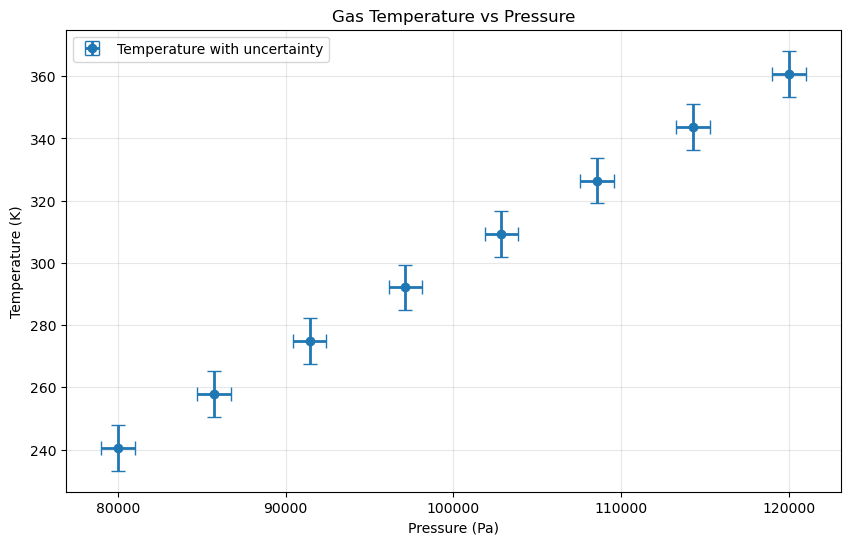

In [14]:
# Generate sample data to test the plotting function
np.random.seed(rng_seed)

# Create arrays for gas law parameters with uncertainties
pressures = np.linspace(80000, 120000, 8)  # Pa
volumes = np.linspace(0.020, 0.030, 8)  # m³
n_moles = np.linspace(0.8, 1.2, 8)  # mol

# Define uncertainties for each parameter
sigma_P = np.full_like(pressures, 1000.0)  # Pa
sigma_V = np.full_like(volumes, 0.0005)  # m³
sigma_n = np.full_like(n_moles, 0.01)  # mol

# Plot the results using the new function signature
fig1 = plot_temperature_vs_pressure(pressures, volumes, n_moles, sigma_P, sigma_V, sigma_n, show_plot=True)

In [ ]:
grader.check("q2b")

## **Question 3**: Generating Correlated Data

In this question, you'll create a function that generates synthetic datasets with specified correlation properties. Understanding and controlling correlations between variables is crucial in data science, machine learning, and experimental design.

### Background: Correlation and Covariance

**Correlation** measures the linear relationship between two variables. The Pearson correlation coefficient r ranges from -1 to +1:
- **r = +1**: Perfect positive linear correlation
- **r = 0**: No linear correlation  
- **r = -1**: Perfect negative linear correlation

The **correlation matrix** is a symmetric matrix where element (i,j) represents the correlation between variables i and j. The diagonal elements are always 1 (perfect self-correlation).

**Your Task:**

Write a function `generate_correlated_data(N, rng_seed=42)` that generates synthetic data with the following correlation structure:
- **Feature 1 and Feature 2**: Positive correlation (r > 0)
- **Feature 3 and Feature 1**: Near-zero correlation (|r| ≈ 0)
- **Feature 3 and Feature 2**: Near-zero correlation (|r| ≈ 0)

**Requirements:**
- Generate N data points for each of 3 features
- Use `np.random` methods with the provided random seed for reproducibility
- Return three arrays of length N: `feature1`, `feature2`, `feature3`
- Features 1 and 2 should have a clear positive correlation
- Feature 3 should be approximately uncorrelated with both features 1 and 2

**Approach suggestions:**
- Start with independent random variables
- Transform them to create desired correlations
- Consider methods like linear combinations, multivariate normal distributions, or other correlation-inducing transformations

**Parameters:**
- `N`: int, number of data points to generate
- `rng_seed`: int, random seed for reproducibility (default 42)

**Returns:**
- `feature1`: array of length N, first feature
- `feature2`: array of length N, second feature (positively correlated with feature1)
- `feature3`: array of length N, third feature (uncorrelated with features 1 and 2)

A helper function `plot_correlations(feature1, feature2, feature3)` is provided below to visualize your results and compute the correlation matrix for testing.

In [19]:
# PROVIDED HELPER FUNCTION - DO NOT MODIFY
def plot_correlations(feature1, feature2, feature3):
    """
    Create correlation plots and return the correlation matrix.
    
    Parameters:
    -----------
    feature1 : array
        First feature data
    feature2 : array  
        Second feature data
    feature3 : array
        Third feature data
        
    Returns:
    --------
    correlation_matrix : ndarray
        3x3 correlation matrix between the three features
    """
    # Combine features into a single array for correlation calculation
    data = np.column_stack([feature1, feature2, feature3])
    correlation_matrix = np.corrcoef(data.T)
    
    # Create subplot figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot pairwise scatter plots
    axes[0, 0].scatter(feature1, feature2, alpha=0.6, s=20)
    axes[0, 0].set_xlabel('Feature 1')
    axes[0, 0].set_ylabel('Feature 2')
    axes[0, 0].set_title(f'Features 1 vs 2 (r = {correlation_matrix[0,1]:.3f})')
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].scatter(feature1, feature3, alpha=0.6, s=20)
    axes[0, 1].set_xlabel('Feature 1')
    axes[0, 1].set_ylabel('Feature 3')
    axes[0, 1].set_title(f'Features 1 vs 3 (r = {correlation_matrix[0,2]:.3f})')
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[1, 0].scatter(feature2, feature3, alpha=0.6, s=20)
    axes[1, 0].set_xlabel('Feature 2')
    axes[1, 0].set_ylabel('Feature 3')
    axes[1, 0].set_title(f'Features 2 vs 3 (r = {correlation_matrix[1,2]:.3f})')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot correlation matrix as heatmap
    im = axes[1, 1].imshow(correlation_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[1, 1].set_title('Correlation Matrix')
    axes[1, 1].set_xticks([0, 1, 2])
    axes[1, 1].set_yticks([0, 1, 2])
    axes[1, 1].set_xticklabels(['Feature 1', 'Feature 2', 'Feature 3'])
    axes[1, 1].set_yticklabels(['Feature 1', 'Feature 2', 'Feature 3'])
    
    # Add correlation values as text
    for i in range(3):
        for j in range(3):
            axes[1, 1].text(j, i, f'{correlation_matrix[i,j]:.3f}', 
                           ha='center', va='center', fontweight='bold')
    
    plt.colorbar(im, ax=axes[1, 1])
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

In [20]:
def generate_correlated_data(N, rng_seed=42):
    # BEGIN SOLUTION NO PROMPT
    """
    Generate synthetic data with specified correlation properties.
    
    Parameters:
    -----------
    N : int
        Number of data points to generate
    rng_seed : int, default 42
        Random seed for reproducibility
        
    Returns:
    --------
    feature1 : ndarray
        First feature (length N)  
    feature2 : ndarray
        Second feature (length N), positively correlated with feature1
    feature3 : ndarray
        Third feature (length N), uncorrelated with features 1 and 2
    """
    # Set the random seed for reproducibility
    np.random.seed(rng_seed)
    
    # Method: Use multivariate normal distribution to create correlated features
    # Start with independent standard normal variables
    feature1 = np.random.normal(0, 1, N)
    
    # Create feature2 as a linear combination to induce positive correlation
    # feature2 = a * feature1 + b * independent_noise
    # Choose a > 0 for positive correlation, adjust b to control correlation strength
    independent_noise = np.random.normal(0, 1, N)
    a = 0.7  # coefficient for correlation strength
    b = 0.714  # coefficient for noise (chosen so correlation ≈ 0.7)
    feature2 = a * feature1 + b * independent_noise
    
    # Create feature3 as independent random variable (uncorrelated)
    feature3 = np.random.normal(0, 1, N)
    
    return feature1, feature2, feature3
    # END SOLUTION
    """ # BEGIN PROMPT
    # Set the random seed for reproducibility
    np.random.seed(rng_seed)
    
    # Generate feature1 (base feature)
    feature1 = ...
    
    # Generate feature2 (positively correlated with feature1)
    # Hint: Use a linear combination or transformation
    feature2 = ...
    
    # Generate feature3 (uncorrelated with features 1 and 2)
    feature3 = ...
    
    return feature1, feature2, feature3
    """; # END PROMPT

Generated 500 data points for each feature
Feature 1: mean = 0.007, std = 0.980
Feature 2: mean = 0.028, std = 0.941
Feature 3: mean = 0.108, std = 1.009


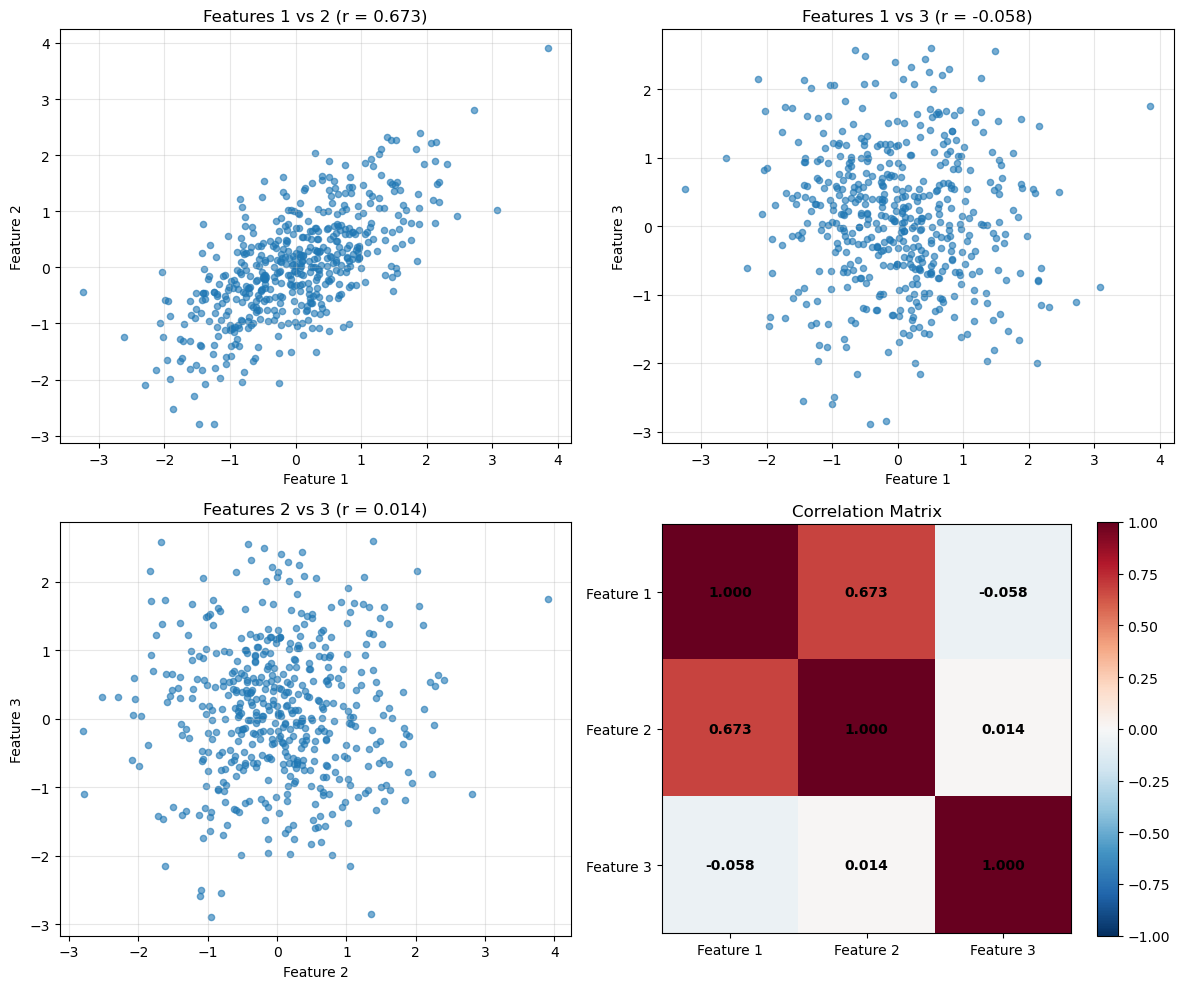

In [21]:
# Generate sample data to test the function
np.random.seed(rng_seed)  

# Generate dataset with N=500 points
feature1, feature2, feature3 = generate_correlated_data(500, rng_seed=rng_seed)

print(f"Generated {len(feature1)} data points for each feature")
print(f"Feature 1: mean = {np.mean(feature1):.3f}, std = {np.std(feature1):.3f}")
print(f"Feature 2: mean = {np.mean(feature2):.3f}, std = {np.std(feature2):.3f}")
print(f"Feature 3: mean = {np.mean(feature3):.3f}, std = {np.std(feature3):.3f}")

# Plot correlations and get correlation matrix
correlation_matrix = plot_correlations(feature1, feature2, feature3)

In [ ]:
grader.check("q3")

## Required disclosure of use of AI technology

Please indicate whether you used AI to complete this homework. If you did, explain how you used it in the python cell below, as a comment.

In [25]:
# BEGIN SOLUTION NO PROMPT
# END SOLUTION
""" # BEGIN PROMPT
"""
# write ai disclosure here:

"""
"""; # END PROMPT

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Upload the .zip file to Gradescope!

In [ ]:
grader.export(pdf=False, force_save=True, run_tests=True)